### 구글 드라이브 연결

In [ ]:
# upload an image
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 공유 폴더 접속 (mecathon 폴더)

In [ ]:
%cd /content/gdrive/Shareddrives/메카톤2021여름
!mkdir mecathon
%cd mecathon

/content/gdrive/Shareddrives/메카톤2021여름
mkdir: cannot create directory ‘mecathon’: File exists
/content/gdrive/Shareddrives/메카톤2021여름/mecathon


### darknet git에서 가져오기

In [ ]:
# clone darknet repo
# !git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15298, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 15298 (delta 1), reused 7 (delta 1), pack-reused 15289
Receiving objects: 100% (15298/15298), 13.69 MiB | 5.21 MiB/s, done.
Resolving deltas: 100% (10383/10383), done.
Checking out files: 100% (2044/2044), done.


### darknet 설정 및 빌드 (opencv, gpu 설정)

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/gdrive/Shareddrives/메카톤2021여름/mecathon/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1150:10: note: ...thi

### 외부에서 coco dataset을 학습시킨 가중치 다운로드

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-08-02 08:47:58--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  20.3MB/s    in 13s     

2021-08-02 08:48:11 (18.6 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



### 간단하게 사용할 함수

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

### darknet 테스트 해보기

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
^C


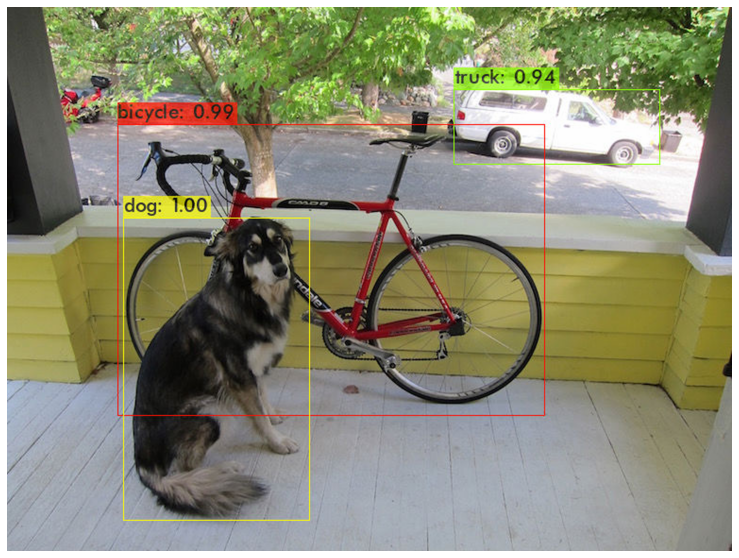

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
^C


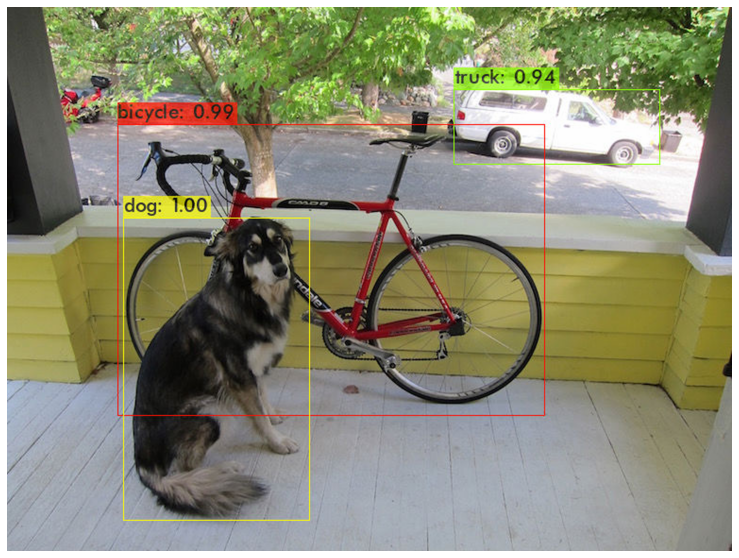

In [ ]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [ ]:
!mkdir custom
!unzip "/content/gdrive/Shareddrives/메카톤2021여름/label_integration/custom.zip" -d "/content/gdrive/Shareddrives/메카톤2021여름/mecathon/darknet/custom"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/gdrive/Shareddrives/메카톤2021여름/mecathon/darknet/custom/img/20210703_171724_061_saved.jpg  
  inflating: /content/gdrive/Shareddrives/메카톤2021여름/mecathon/darknet/custom/img/20210703_171724_061_saved.txt  
  inflating: /content/gdrive/Shareddrives/메카톤2021여름/mecathon/darknet/custom/img/20210703_171724_062_saved.jpg  
  inflating: /content/gdrive/Shareddrives/메카톤2021여름/mecathon/darknet/custom/img/20210703_171724_062_saved.txt  
  inflating: /content/gdrive/Shareddrives/메카톤2021여름/mecathon/darknet/custom/img/20210703_171724_063_saved.jpg  
  inflating: /content/gdrive/Shareddrives/메카톤2021여름/mecathon/darknet/custom/img/20210703_171724_063_saved.txt  
  inflating: /content/gdrive/Shareddrives/메카톤2021여름/mecathon/darknet/custom/img/20210703_171724_064_saved.jpg  
  inflating: /content/gdrive/Shareddrives/메카톤2021여름/mecathon/darknet/custom/img/20210703_171724_064_saved.txt  
  inflating:

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

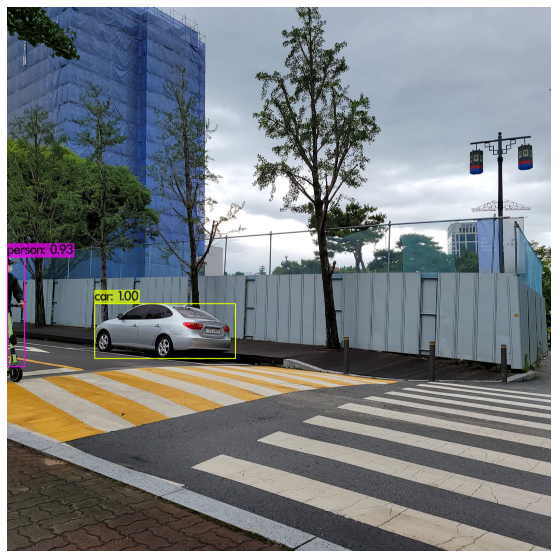

In [ ]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
!./darknet detect cfg/yolov3.cfg yolov3.weights "/content/gdrive/Shareddrives/메카톤2021여름/mecathon/darknet/custom/img/20210703_170233_008_saved.jpg"
imShow('predictions.jpg')

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-08-02 08:59:10--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  19.2MB/s    in 9.0s    

2021-08-02 08:59:20 (17.3 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train custom/obj.data custom/yolov3.cfg darknet53.conv.74 -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 285711, rewritten_bbox = 0.020650 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.772154), count: 3, class_loss = 0.399120, iou_loss = 0.189947, total_loss = 0.589067 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.843674), count: 2, class_loss = 0.250902, iou_loss = 0.034112, total_loss = 0.285014 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000005, iou_loss = 0.000000, total_loss = 0.000005 
 total_bbox = 285716, rewritten_bbox = 0.020650 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000422, iou_loss = 0.000000, total_loss = 0.000422 
v3 (mse loss, Normal